In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [58]:
transform = transforms.ToTensor()

#transform = transforms.Compose([
   #transforms.Normalize((0.5),(0.5))

#])

mnist_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)


In [59]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_data,
                                          batch_size = 64,
                                          shuffle =True)

In [60]:
dataiter = iter(data_loader)

images, labels = next(dataiter)

print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [61]:
class Autoencoder(nn.Module):
    def __init__(self):
        #N,784(28*28)
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3)
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [62]:
model = Autoencoder()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [63]:
num_epochs = 3
outputs =[]

for epochs in range(num_epochs):
    for(img, _) in data_loader:
        img = img.to(device)
        img = img.reshape(-1,28*28)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epochs : {epochs +1}, Loss:{loss.item():.4f}')
    outputs.append((epochs, img, recon))

Epochs : 1, Loss:0.0514
Epochs : 2, Loss:0.0418
Epochs : 3, Loss:0.0354


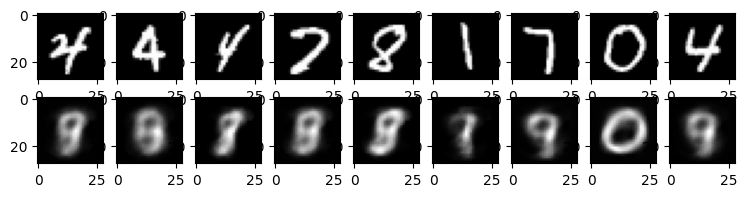

In [64]:
for k in range(0, num_epochs , 4):
    plt.figure(figsize= (9, 2))
    plt.gray()
    
    imgs = outputs[k][1].cpu().detach().numpy()
    
    recon = outputs[k][2].cpu().detach().numpy()
    for i , item in enumerate(imgs):
        if i>= 9:break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

        plt.imshow(item[0])
    for i , item in enumerate(recon):
        if i>= 9:break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28, 28)

        plt.imshow(item[0])
    

In [65]:
class Autoencoder(nn.Module):
    def __init__(self):
        #N,784(28*28)
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1,16,3, stride =2 , padding = 1), # N, 16, 14,14
            nn.ReLU(),
            nn.Conv2d(16,32,3, stride =2 , padding = 1), # N , 32, 7,7
            nn.ReLU(),
            nn.Conv2d(32,64,7) #N, 64,1,1
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64,32,7),
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,3, stride =2 , padding = 1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,1,3, stride =2 , padding = 1, output_padding=1),
            nn.Sigmoid()
        )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [66]:
model = Autoencoder()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the GPU
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [69]:
num_epochs = 10
outputs =[]

for epochs in range(num_epochs):
    for(img, _) in data_loader:
        img = img.to(device)
        
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epochs : {epochs +1}, Loss:{loss.item():.4f}')
    outputs.append((epochs, img, recon))

Epochs : 1, Loss:0.0038
Epochs : 2, Loss:0.0033
Epochs : 3, Loss:0.0030
Epochs : 4, Loss:0.0028
Epochs : 5, Loss:0.0028
Epochs : 6, Loss:0.0027
Epochs : 7, Loss:0.0026
Epochs : 8, Loss:0.0028
Epochs : 9, Loss:0.0027
Epochs : 10, Loss:0.0028


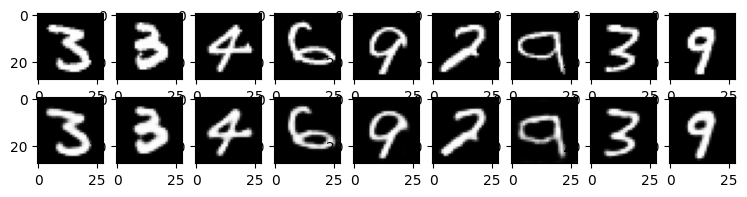

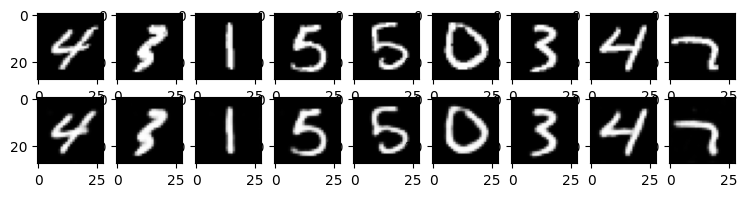

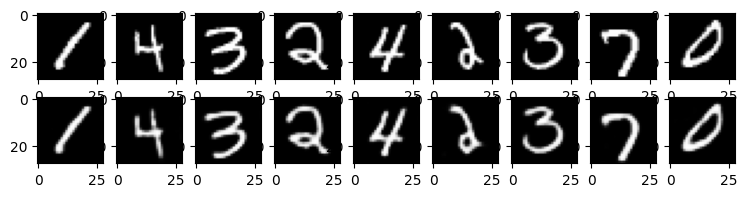

In [71]:
for k in range(0, num_epochs , 4):
    plt.figure(figsize= (9, 2))
    plt.gray()
    
    imgs = outputs[k][1].cpu().detach().numpy()
    
    recon = outputs[k][2].cpu().detach().numpy()
    for i , item in enumerate(imgs):
        if i>= 9:break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

        plt.imshow(item[0])
    for i , item in enumerate(recon):
        if i>= 9:break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28, 28)

        plt.imshow(item[0])